# Laba 27 zadanie domowe
Wykonaj następujące kroki analizy dla zbioru `penguins`:


## Eksploracja danych (EDA)
1. Wczytaj zbiór danych penguins z seaborn.

2. Sprawdź podstawowe statystyki (df.describe(), df.info()).

3. Sprawdź, czy są brakujące wartości – jeśli tak, uzupełnij je lub usuń.

3. Zwizualizuj dane (np. wykresy par sns.pairplot()).

## Redukcja wymiarowości (PCA)
1. Usuń kolumny kategoryczne (np. gatunek, płeć) przed PCA.

2. Przeskaluj dane (`StandardScaler`).

3. Wykonaj PCA i zredukuj wymiarowość do 2 głównych komponentów.

4. Zwizualizuj dane po PCA na wykresie 2D.

## Klasteryzacja
1. K-Means:

- Ustal optymalną liczbę klastrów metodą Silhouette.

- Wykonaj klasteryzację i przypisz klastry do danych.

2. DBSCAN:

- Dobierz odpowiednie wartości eps i min_samples.

- Sprawdź, czy lepiej grupuje pingwiny niż K-Means.

3. Porównanie metod:

- Oblicz Silhouette Score dla obu metod.

- Która metoda najlepiej oddaje rzeczywisty podział na gatunki pingwinów?

## Wizualizacja wyników
1. Narysuj wykres klastrów dla PCA+K-Means oraz PCA+DBSCAN.

2. Porównaj wyniki z rzeczywistymi etykietami gatunków.

## Wnioski
1. Czy klasteryzacja poprawnie odtworzyła grupy gatunków pingwinów?

2. Która metoda działała najlepiej?

3. Jakie są zalety i ograniczenia PCA oraz klasteryzacji?


In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Wczytanie danych CO2
penguins = sns.load_dataset("penguins").dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    

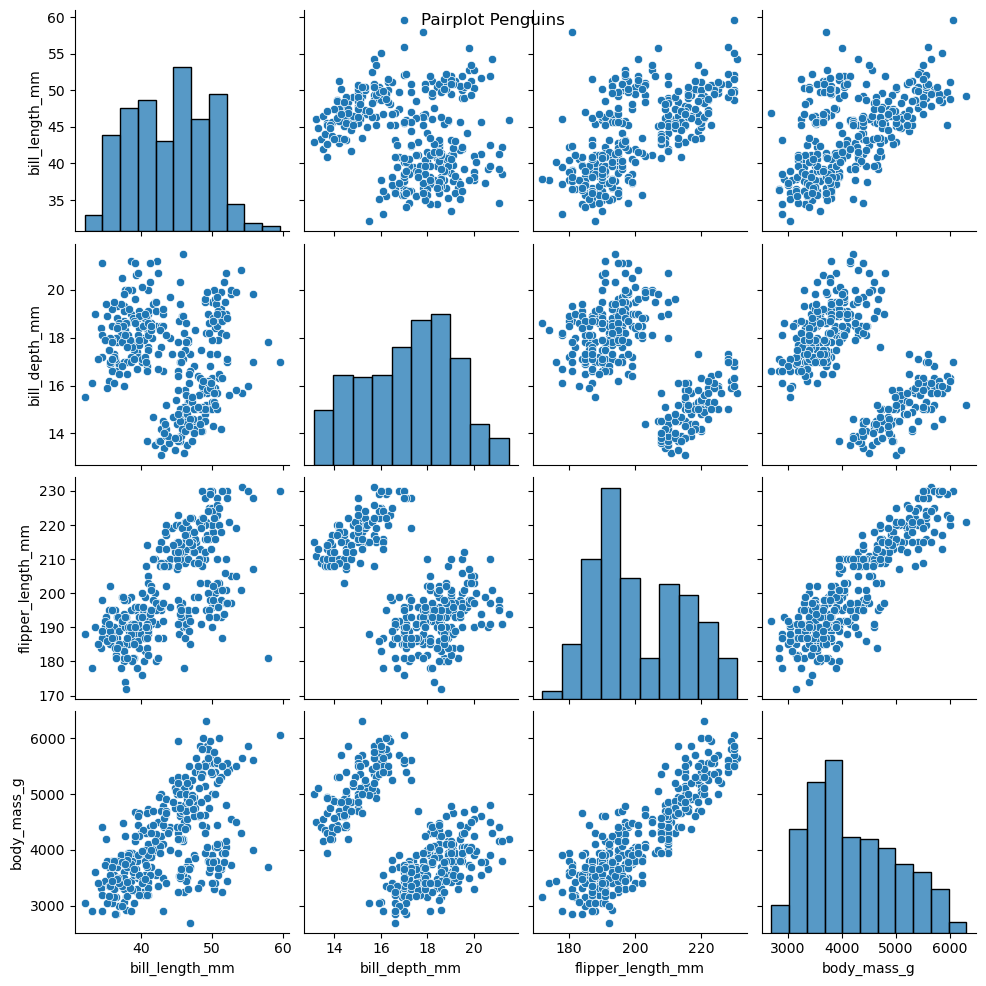

In [52]:
# Eksploracja danych

print(penguins.describe())
print(penguins.info())

# Sprawdzenie brakujących wartości
print(penguins.isnull().sum())

# usunięcie wierszy z brakującymi danymi
penguins.dropna(inplace=True)  

# Wizualizacja danych
sns.pairplot(penguins)
plt.suptitle("Pairplot Penguins")
plt.show()


    

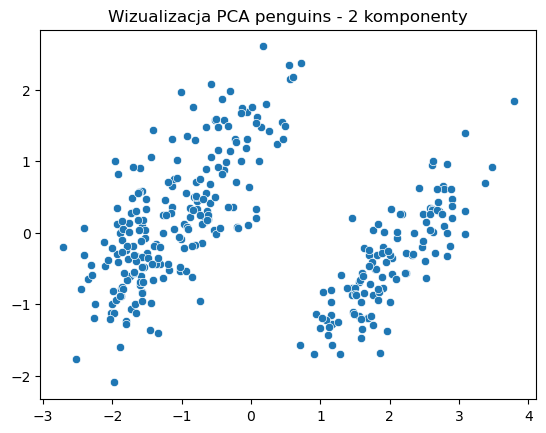

In [53]:
#Redukcja wymiarowości (PCA)

# Usunięcie kolumn kategorycznych
Kolumny_numeryczne = penguins.drop(columns=['species', 'island', 'sex'])

# Przeskalowanie danych
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_scaled = scaler.fit_transform(Kolumny_numeryczne)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)


sns.scatterplot(x = pca_result[:, 0], y = pca_result[:, 1])
plt.title("Wizualizacja PCA penguins - 2 komponenty")
plt.show()
    

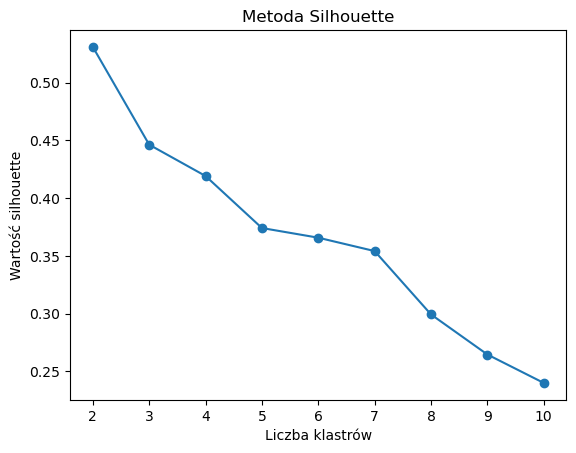

In [54]:

# Wybór cech do klasteryzacji
Klasteryzacja = Kolumny_numeryczne
scaler = StandardScaler()
scaled = scaler.fit_transform(Klasteryzacja)

k_values = range(2, 11)

def plotuj_silhouette(df, k_values = range(2,11)):
    silhouettes = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        silhouettes.append(silhouette_score(df, kmeans.fit_predict(df)))

# Wizualizacja metody Silhouette na wykresie.
    plt.plot(k_values, silhouettes, marker='o')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Wartość silhouette')
    plt.title('Metoda Silhouette')
    plt.show()
    
plotuj_silhouette(scaled, k_values=range(2,11))

# Przypisanie klastrów do danych
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
Kolumny_numeryczne['cluster_kmeans'] = kmeans.fit_predict(scaled)


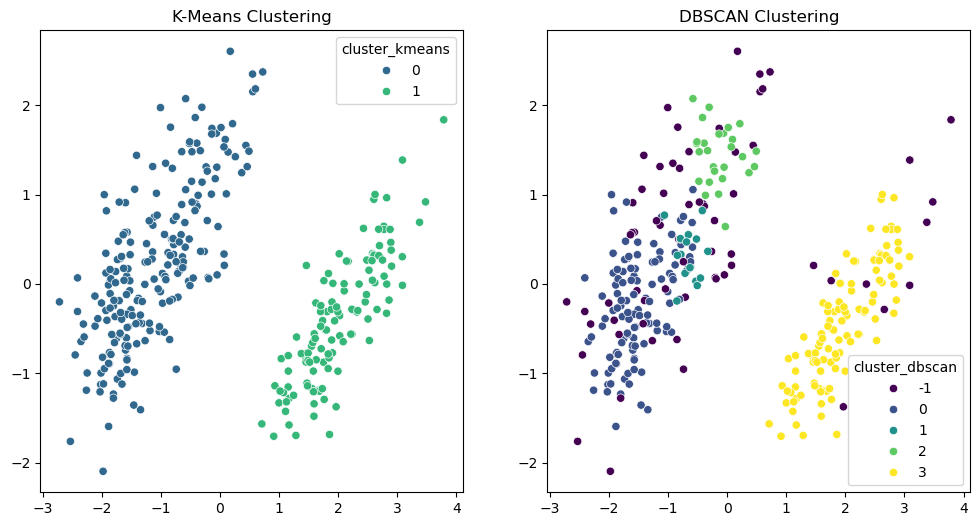

In [55]:

# Dobór parametrów eps i min_samples
eps = 0.5  
min_samples = 5  

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters_dbscan = dbscan.fit_predict(df_scaled)

Kolumny_numeryczne['cluster_dbscan'] = clusters_dbscan

# Wizualizacja klastrów K-Means
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=Kolumny_numeryczne['cluster_kmeans'], palette='viridis')
plt.title("K-Means Clustering")

# Wizualizacja klastrów DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=Kolumny_numeryczne['cluster_dbscan'], palette='viridis')
plt.title("DBSCAN Clustering")

plt.show()

In [57]:

# Obliczanie wartości silhouette dla K-Means
kmeans_silhouette = silhouette_score(scaled, Kolumny_numeryczne['cluster_kmeans'])
print(f'Silhouette Score dla K-Means: {kmeans_silhouette:.3f}')

# Obliczanie wartości silhouette dla DBSCAN

if len(Kolumny_numeryczne[Kolumny_numeryczne['cluster_dbscan'] == -1]) < len(Kolumny_numeryczne):
    dbscan_silhouette = silhouette_score(scaled[Kolumny_numeryczne['cluster_dbscan'] != -1], 
                                         Kolumny_numeryczne['cluster_dbscan'][Kolumny_numeryczne['cluster_dbscan'] != -1])
else:
    dbscan_silhouette = None

print(f'Silhouette Score dla DBSCAN: {dbscan_silhouette:.3f}' if dbscan_silhouette is not None else 'DBSCAN nie obliczył wartości silhouette (wszystkie punkty to szum).')

# Porównanie wyników
if dbscan_silhouette is not None and kmeans_silhouette > dbscan_silhouette:
    print("K-Means lepiej oddaje rzeczywisty podział na gatunki pingwinów.")
elif dbscan_silhouette is not None and kmeans_silhouette < dbscan_silhouette:
    print("DBSCAN lepiej oddaje rzeczywisty podział na gatunki pingwinów.")
else:
    print("Nie można porównać wyników ze względu na brak danych.")

Silhouette Score dla K-Means: 0.531
Silhouette Score dla DBSCAN: 0.422
K-Means lepiej oddaje rzeczywisty podział na gatunki pingwinów.


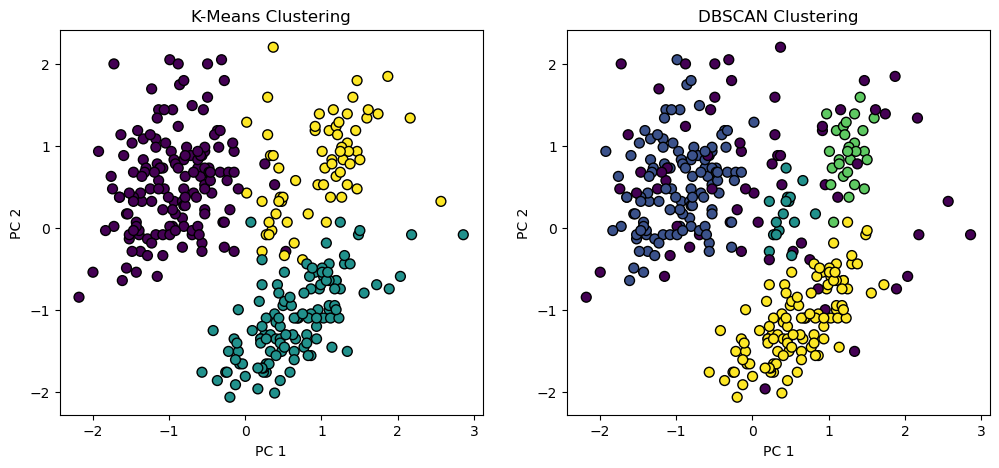

In [58]:
# PCA
pca = PCA(n_components=2)
X_pca = scaler.fit_transform(Kolumny_numeryczne)

# K-Means
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X_pca)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_pca)

# Wizualizacja K-Means
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-Means Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Wizualizacja DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()



K-Means lepiej oddaje rzeczywisty podział na gatunki pingwinów.

Zalety PCA - pozwala na uproszczenie danych, ułatwienia wizualizację 
Organiczenia - wyniki są trudne do interpretacji

Zalety klasteryzacji - umożliwia grupowanie, może być stosowana do różnych typów danych
Organiczenia klasteryzacji - wybór liczby klastrów, wrażliwość na nieprawidłowe dane,